# Pair

Basic examples of pairs, trying to extract fires.
Here the pivot product will be the pre-event image, the child being the post-event.

## Initialization of the notebook

- Imports
- Loggers
- Paths

In [1]:
from cloudpathlib import AnyPath
from sertit import vectors
from eosets.pair import Pair
from eoreader.bands import NBR
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

In [2]:
# Create logger
import logging
from sertit import logs

logs.init_logger(logging.getLogger("eoreader"), log_lvl=logging.INFO)
logs.init_logger(logging.getLogger("eosets"))

In [3]:
# Get the base paths
data_path = AnyPath(r"/home/ds2_db3/CI/eosets/PAIR")

In [4]:
# Get a dictionary of Sentinel-2, Sentinel-3 and Landsat-8 pivot and child images
s2_paths = {
    "pivot_paths": [data_path / "S2A_MSIL1C_20200824T110631_N0209_R137_T29TQE_20200824T150432.zip"],
    "child_paths": [data_path / "S2B_MSIL1C_20200908T110619_N0209_R137_T29TQE_20200908T132324.zip"],
}

s3_paths = {
    "pivot_paths": [data_path / "S3B_SL_1_RBT____20200824T105515_20200824T105815_20200825T151744_0179_042_322_2340_LN2_O_NT_004.SEN3"],
    "child_paths": [data_path / "S3B_SL_1_RBT____20200909T104016_20200909T104316_20200910T161910_0179_043_165_2340_LN2_O_NT_004.SEN3"],
}

l8_paths = {
    "pivot_paths": [data_path / "LC08_L1TP_202032_20200828_20200906_02_T1.tar"],
    "child_paths": [data_path / "LC08_L1TP_202032_20200929_20201006_02_T1.tar"],
}

all_paths = [s2_paths, s3_paths, l8_paths]

aoi_path = data_path / "Fire_Spain.geojson"

## Creation of the Pairs and loading of dNBR

To create a pair, you just have to give the paths of your products.
The pivot and child products should overlap.

The goal here will be to extract the `dNBR` band of the pair and display it for every pair.

$$
    dNBR = NBR_{pre} - NBR_{post}

$$
$$
    NBR = \frac{NIR - SWIR}{NIR + SWIR}
$$

2023-04-28 17:45:21,613 - [DEBUG] - *** Loading ['NBR'] for 20200824T110631_S2_T29TQE_L1C_150432 ***
2023-04-28 17:45:22,487 - [DEBUG] - Merging bands NBR
2023-04-28 17:45:22,588 - [DEBUG] - Collocating bands
2023-04-28 17:45:22,612 - [DEBUG] - *** Loading ['NBR'] for 20200908T110619_S2_T29TQE_L1C_132324 ***
2023-04-28 17:45:23,267 - [DEBUG] - Merging bands NBR
2023-04-28 17:45:23,359 - [DEBUG] - Collocating bands


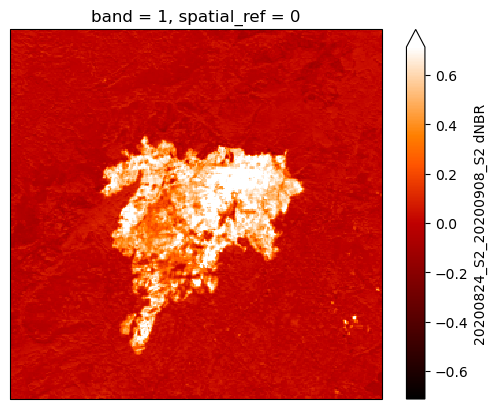

2023-04-28 17:45:23,939 - [DEBUG] - *** Loading ['NBR'] for 20200824T105515_S3_SLSTR_RBT ***
2023-04-28 17:45:42,259 - [DEBUG] - Merging bands NBR
2023-04-28 17:45:42,355 - [DEBUG] - Collocating bands
2023-04-28 17:45:42,379 - [DEBUG] - *** Loading ['NBR'] for 20200909T104016_S3_SLSTR_RBT ***
2023-04-28 17:46:00,769 - [DEBUG] - Merging bands NBR
2023-04-28 17:46:00,862 - [DEBUG] - Collocating bands


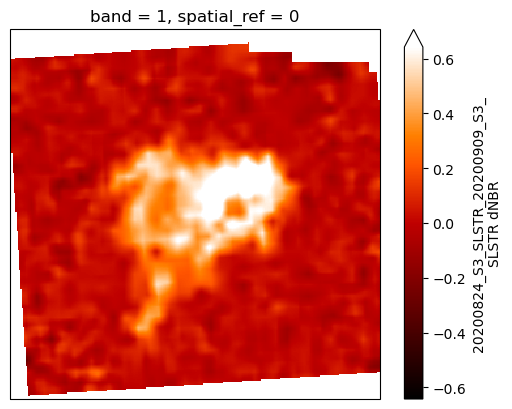

2023-04-28 17:46:05,188 - [DEBUG] - *** Loading ['NBR'] for 20200828T110153_L8_202032_OLI_TIRS ***
2023-04-28 17:46:05,550 - [DEBUG] - Merging bands NBR
2023-04-28 17:46:05,640 - [DEBUG] - Collocating bands
2023-04-28 17:46:05,663 - [DEBUG] - *** Loading ['NBR'] for 20200929T110204_L8_202032_OLI_TIRS ***
2023-04-28 17:46:06,018 - [DEBUG] - Merging bands NBR
2023-04-28 17:46:06,107 - [DEBUG] - Collocating bands


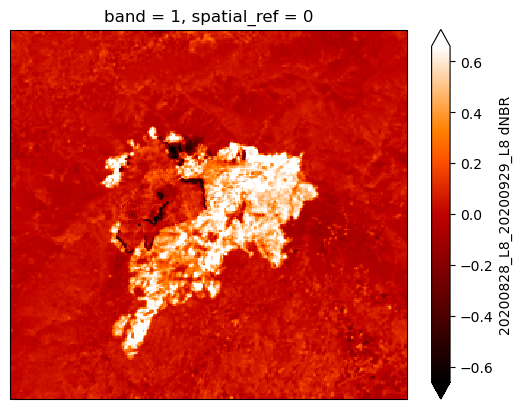

In [5]:
for paths in all_paths:
    # Create pair with pivot and child paths
    pair = Pair(**paths)

    # Load dNBR
    _, _, dnbr = pair.load(
        diff_bands=NBR,
        window=aoi_path,
        pixel_size=60
    )
    dnbr = dnbr[NBR]
    dnbr.attrs["long_name"] = f"{pair.condensed_name} dNBR"

    # Plot the pairs
    crs = ccrs.UTM(str(dnbr.rio.crs.to_epsg())[-2:])
    dnbr.plot(
        robust=True,
        transform=crs,
        x="x",
        y="y",
        cmap="gist_heat",
        subplot_kws={'projection':crs}
    )
    plt.show()